<a href="https://colab.research.google.com/github/MArtistForLife/GoogleTrends/blob/main/GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import os
# to change to specific folder in google drive that is needed
os.chdir('/content/drive/My Drive/Colab Notebooks/GoogleTrends')

import matplotlib.pyplot as plt

Mounted at /content/drive


# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
print(f"The dimensions of df_tesla are {df_tesla.shape}.")
print(f"The dimensions of df_unemployment are {df_unemployment.shape}.")

The dimensions of df_tesla are (124, 3).
The dimensions of df_unemployment are (181, 3).


In [4]:
df_tesla[:5]

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [5]:
print(f"Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}")
print(f"Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}")

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [6]:
df_tesla.describe() # tells you a bunch of cool statistical info

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [7]:
df_unemployment[:5]

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [8]:
print(f"Largest value for Unemployment Benefits in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}")
print(f"Smallest value for Unemployment Benefits: {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}")


Largest value for Unemployment Benefits in Web Search: 100
Smallest value for Unemployment Benefits: 14


### Bitcoin

In [9]:
print(df_btc_price.shape) # for daily closing prices
df_btc_price[:5]

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [10]:
print(df_btc_search.shape) # for trade volume of bitcoin
df_btc_search[:5]

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [11]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}")')

largest BTC News Search: 100")


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [14]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False
Missing values for BTC price?: True


In [25]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
# to find how many missing values there are

Number of missing values: 2


In [30]:
df_btc_price[df_btc_price.CLOSE.isna()]
# WHERE in the column called CLOSE are  these missing values located?

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found.

In [ ]:
df_btc_price = df_btc_price.dropna(inplace = True)
# to get rid of the NaN values by overwriting/revising the dataframe

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [16]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [17]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6
...,...,...,...
176,2018-09-01,14,3.7
177,2018-10-01,15,3.8
178,2018-11-01,16,3.7
179,2018-12-01,17,3.9


In [22]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5
...,...,...
68,2020-05-01,22
69,2020-06-01,13
70,2020-07-01,14
71,2020-08-01,16


In [20]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [25]:
df_tesla.MONTH[:5]

,MONTH
0,2010-06-01
1,2010-07-01
2,2010-08-01
3,2010-09-01
4,2010-10-01


In [26]:
df_unemployment.MONTH[:5]

,MONTH
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01


In [27]:
df_btc_search.MONTH[:5]

,MONTH
0,2014-09-01
1,2014-10-01
2,2014-11-01
3,2014-12-01
4,2015-01-01


In [28]:
df_btc_price.DATE[:5]

,DATE
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [29]:
# bitcoin price = daily data
# bitcoin search = monthly data
# specify in bitcoin price: DATE column --> M (month) frequency --> resample to monthly data

df_btcMonthly = df_btc_price.resample("M", on="DATE").last()
# the .last() is bc we want the price at the end of the month when we treat data

<ipython-input-29-667adf6dca76>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btcMonthly = df_btc_price.resample("M", on="DATE").last()


In [32]:
print(df_btc_search.shape)

(73, 2)


In [30]:
print(df_btcMonthly.shape)
df_btcMonthly[:5]
# yay!!! same number of rows in the price data as in the search data

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [55]:
# Create locators for ticks on the time axis
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y') # e.g., 2014

In [56]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

Text(0, 0.5, 'Search Trend')

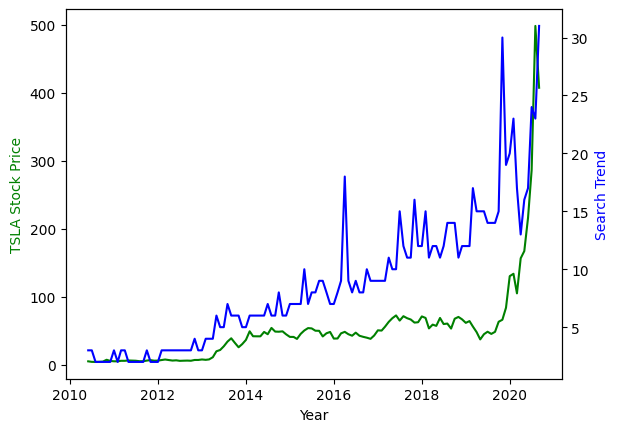

In [57]:
axis1 = plt.gca() # get current axis
axis2 = axis1.twinx() # create a second axis; twinx means they will share the same x-axis

axis1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color = "g")
axis2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, "b")
# for the part after df_tesla., first put the kind of data (monthly)
# then, put the exact name of the columns you want for axis 1 and axis 2

# Add labels and title
axis1.set_xlabel("Year")
axis1.set_ylabel("TSLA Stock Price", color = "green")
axis2.set_ylabel("Search Trend", color = "blue")

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis.

Text(0, 0.5, 'Search Trend')

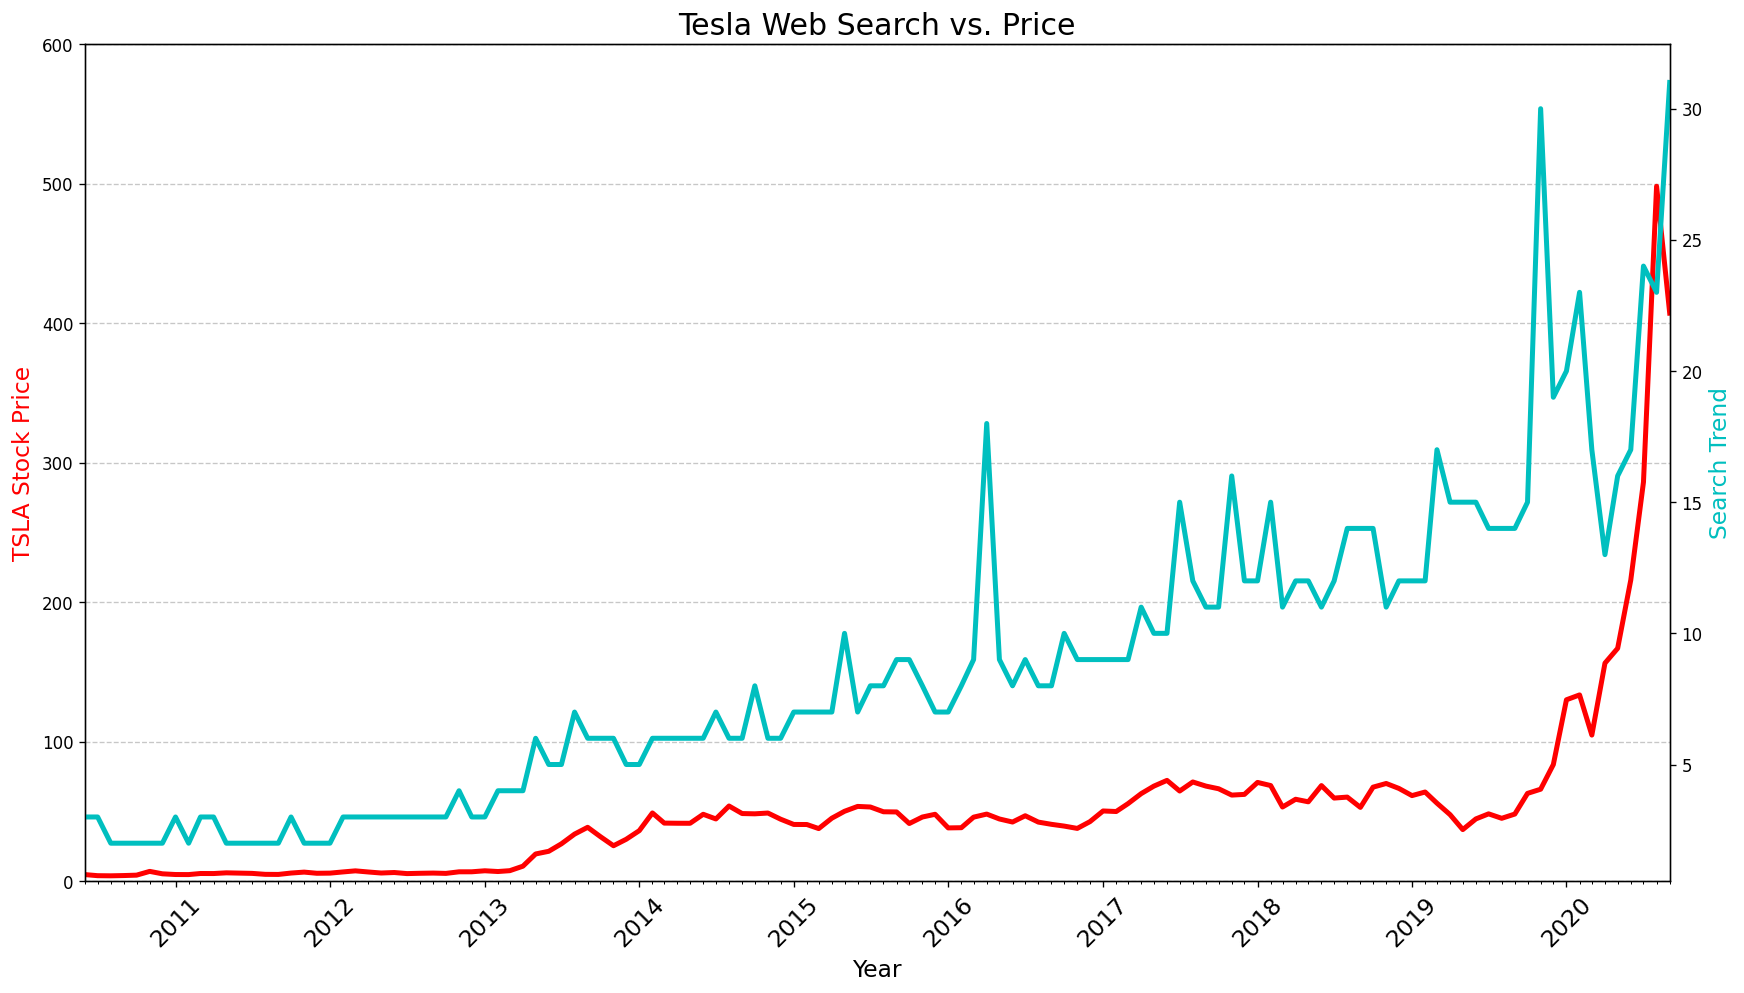

In [60]:
plt.figure(figsize=(14, 8), dpi = 120)
plt.title("Tesla Web Search vs. Price", fontsize = 18)
plt.grid(True, axis = "y", linestyle = "--", alpha = 0.7)
plt.xticks(rotation = 45, fontsize = 14)
plt.tight_layout()

axis1 = plt.gca() # get current axis
axis1.xaxis.set_major_locator(years)  # Use major locator for years
axis1.xaxis.set_major_formatter(years_fmt)  # Set formatter for years
axis1.xaxis.set_minor_locator(months)  # Use minor locator for months
axis2 = axis1.twinx() # create a second axis; twinx means they will share the same x-axis

axis1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color = "r", linewidth = 3)
axis2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, "c", linewidth = 3)
# for the part after df_tesla., first put the kind of data (monthly)
# then, put the exact name of the columns you want for axis 1 and axis 2

axis1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()]) # to set x-axis limits
axis1.set_ylim([0, 600]) # to se y-axis limits

# Add labels and title
axis1.set_xlabel("Year", fontsize = 14)
axis1.set_ylabel("TSLA Stock Price", color = "red", fontsize = 14)
axis2.set_ylabel("Search Trend", color = "c", fontsize = 14) # i like this blue better >:D


### Bitcoin (BTC) Price vs. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [62]:
# now let's do the same thing for bitcoin!!! welpy welp

Text(0, 0.5, 'Search Trend')

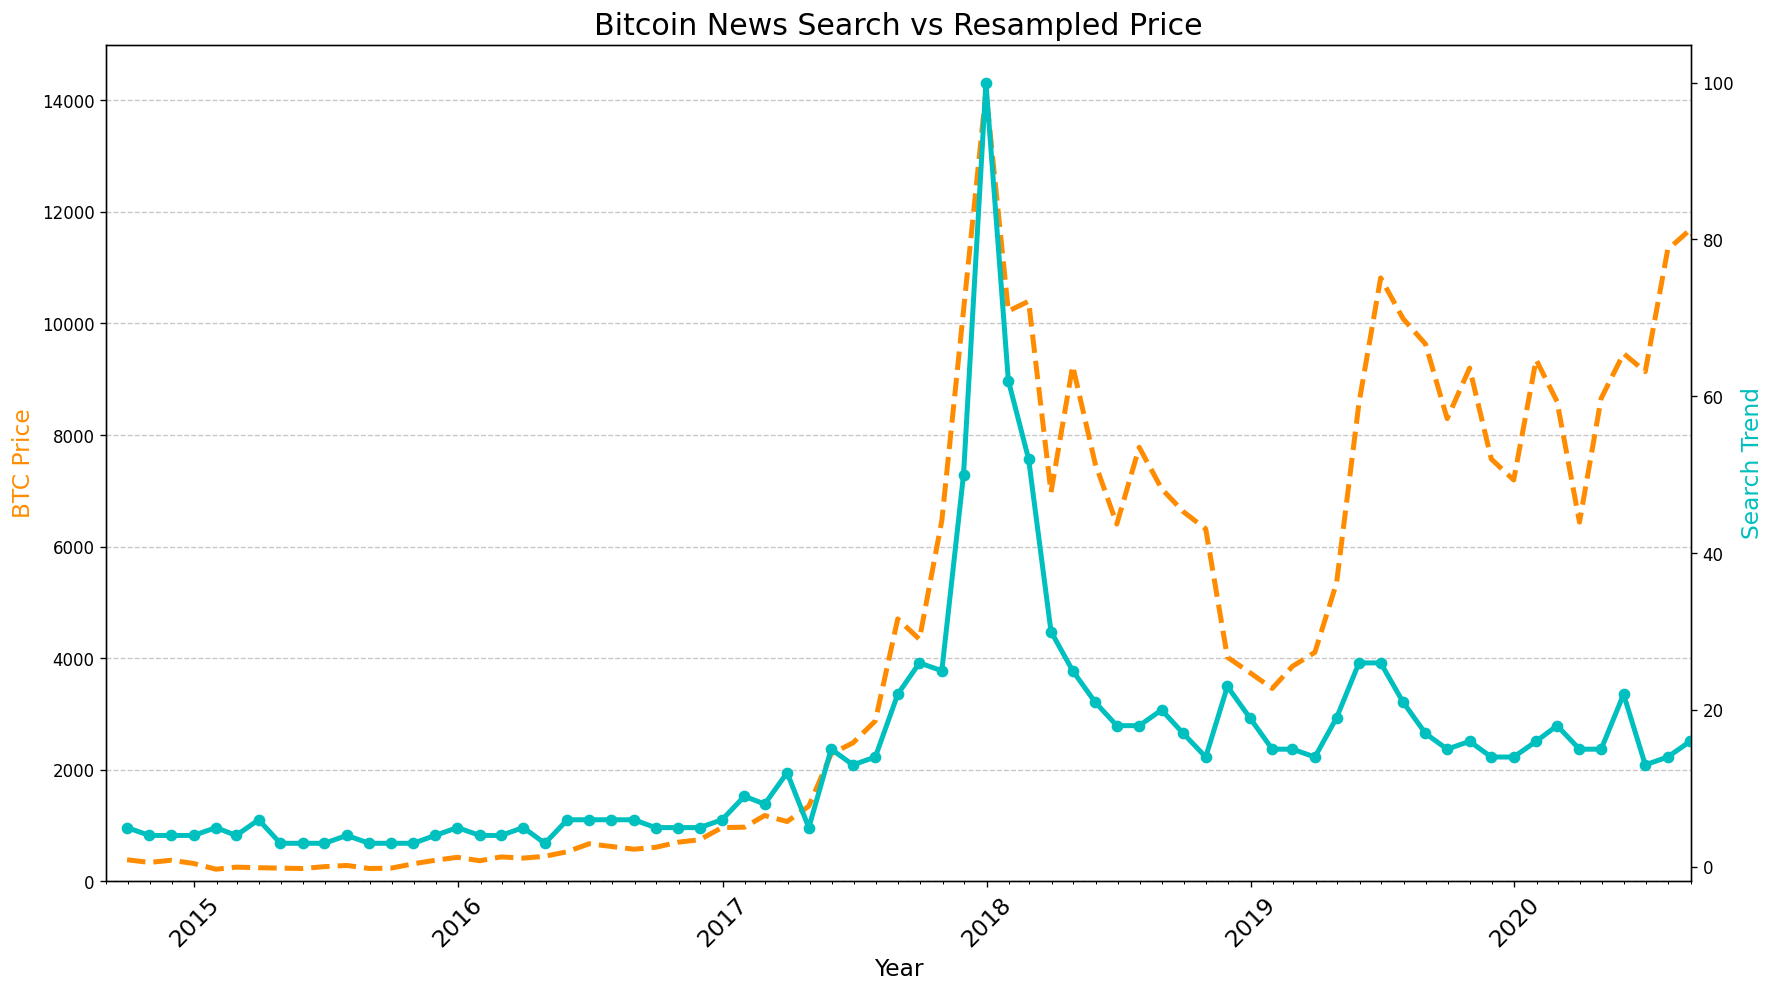

In [65]:
plt.figure(figsize=(14, 8), dpi = 120)
plt.title("Bitcoin News Search vs Resampled Price", fontsize = 18)
plt.grid(True, axis = "y", linestyle = "--", alpha = 0.7)
plt.xticks(rotation = 45, fontsize = 14)
plt.tight_layout()

axis1 = plt.gca() # get current axis
axis1.xaxis.set_major_locator(years)  # Use major locator for years
axis1.xaxis.set_major_formatter(years_fmt)  # Set formatter for years
axis1.xaxis.set_minor_locator(months)  # Use minor locator for months
axis2 = axis1.twinx() # create a second axis; twinx means they will share the same x-axis

axis1.plot(df_btcMonthly.index, df_btcMonthly.CLOSE, color = "darkorange", linewidth = 3, linestyle = "--")
axis2.plot(df_btcMonthly.index, df_btc_search.BTC_NEWS_SEARCH, "c", linewidth = 3, marker = "o")
# then, put the exact name of the columns you want for axis 1 and axis 2

axis1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()]) # to set x-axis limits
axis1.set_ylim([0, 15000]) # to se y-axis limits

# Add labels and title
axis1.set_xlabel("Year", fontsize = 14)
axis1.set_ylabel("BTC Price", color = "darkorange", fontsize = 14)
axis2.set_ylabel("Search Trend", color = "c", fontsize = 14) # i like this blue better >:D


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

In [66]:
# for unemployment stuff whoo whoo XD

Text(0, 0.5, 'Search Trend')

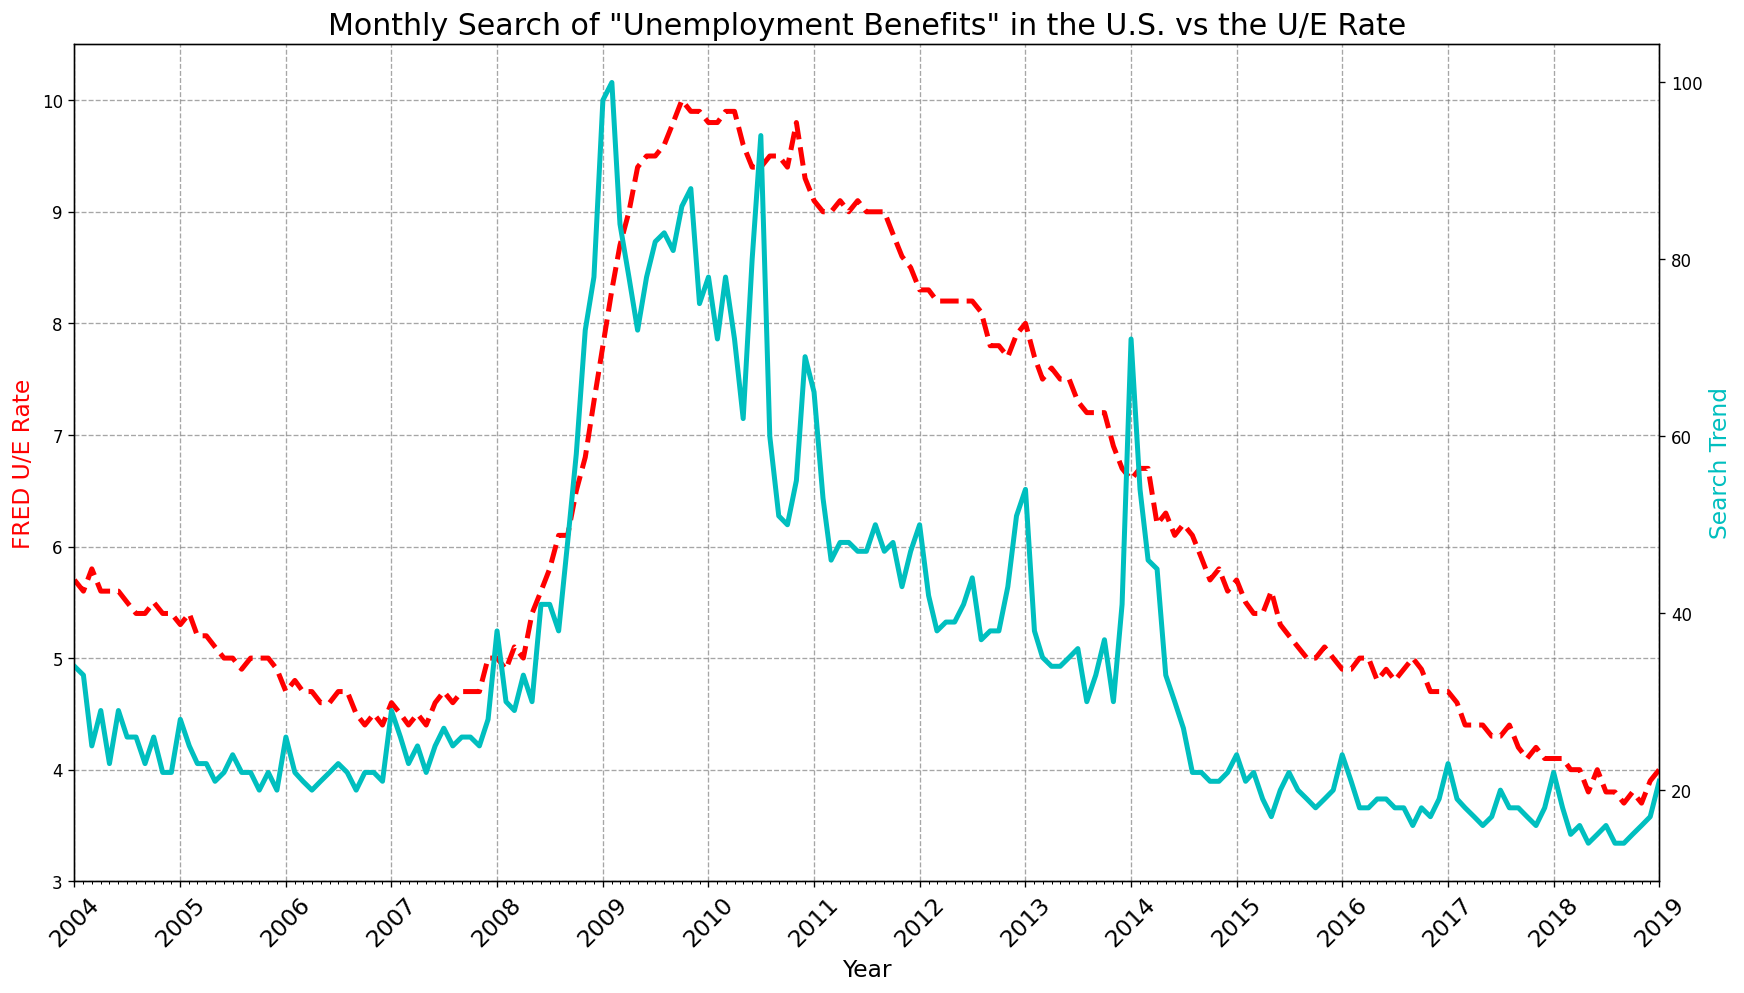

In [71]:
plt.figure(figsize=(14, 8), dpi = 120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize = 18)
plt.grid(color = "grey", linestyle = "--", alpha = 0.7)
plt.xticks(rotation = 45, fontsize = 14)
plt.tight_layout()

axis1 = plt.gca() # get current axis
axis1.xaxis.set_major_locator(years)  # Use major locator for years
axis1.xaxis.set_major_formatter(years_fmt)  # Set formatter for years
axis1.xaxis.set_minor_locator(months)  # Use minor locator for months
axis2 = axis1.twinx() # create a second axis; twinx means they will share the same x-axis

axis1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color = "r", linewidth = 3, linestyle = "--")
axis2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, "c", linewidth = 3)
# then, put the exact name of the columns you want for axis 1 and axis 2

axis1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()]) # to set x-axis limits
axis1.set_ylim(bottom = 3, top = 10.5) # to se y-axis limits

# Add labels and title
axis1.set_xlabel("Year", fontsize = 14)
axis1.set_ylabel("FRED U/E Rate", color = "red", fontsize = 14)
axis2.set_ylabel("Search Trend", color = "c", fontsize = 14) # i like this blue better >:D


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [73]:
# more extension lol welp welp

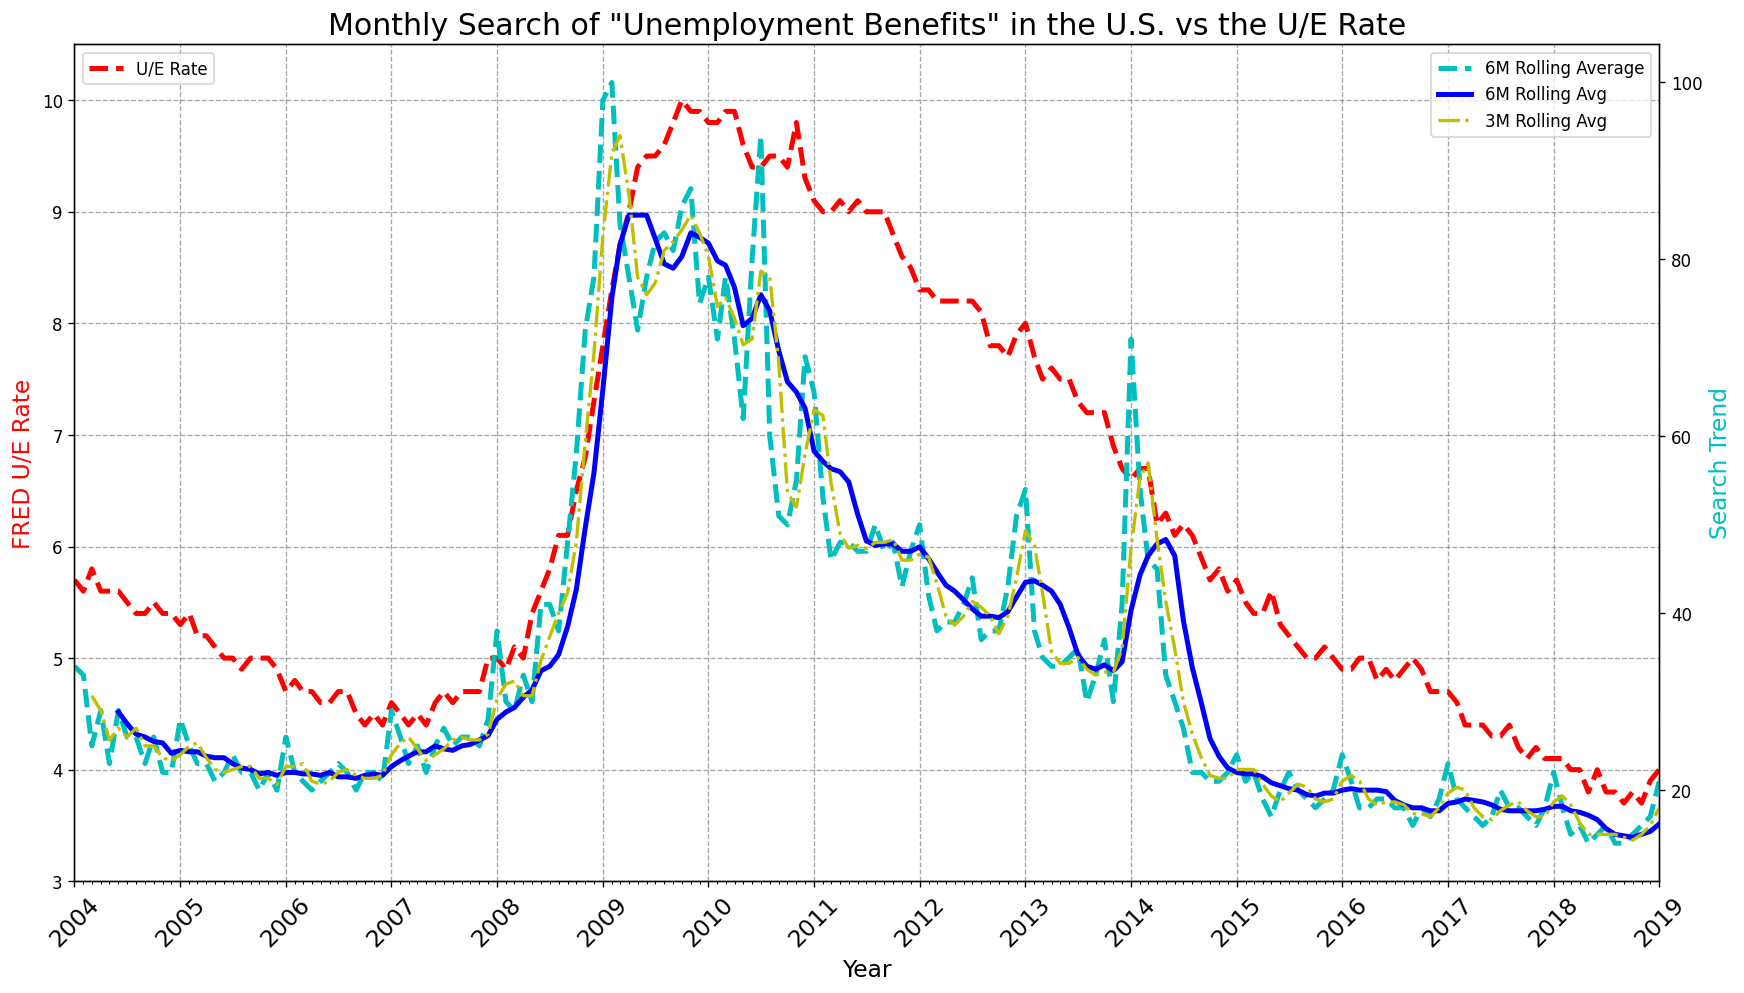

In [76]:
# for averages
df_unemployment['WEB_SEARCH_3M_AVG'] = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=3).mean()
df_unemployment['WEB_SEARCH_6M_AVG'] = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=6).mean()

plt.figure(figsize=(14, 8), dpi = 120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize = 18)
plt.grid(color = "grey", linestyle = "--", alpha = 0.7)
plt.xticks(rotation = 45, fontsize = 14)
plt.tight_layout()

axis1 = plt.gca() # get current axis
axis1.xaxis.set_major_locator(years)  # Use major locator for years
axis1.xaxis.set_major_formatter(years_fmt)  # Set formatter for years
axis1.xaxis.set_minor_locator(months)  # Use minor locator for months
axis2 = axis1.twinx() # create a second axis; twinx means they will share the same x-axis

axis1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color = "r", linewidth = 3, linestyle = "--", label = "U/E Rate")
axis2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, "c", linewidth = 3, linestyle = "--", label = "6M Rolling Average")
axis2.plot(df_unemployment.MONTH, df_unemployment.WEB_SEARCH_6M_AVG, "b", linewidth=3, linestyle="-", label="6M Rolling Avg")
# for 3-month averages
axis2.plot(df_unemployment.MONTH, df_unemployment.WEB_SEARCH_3M_AVG, "y", linewidth=2, linestyle="-.", label="3M Rolling Avg")
# then, put the exact name of the columns you want for axis 1 and axis 2

axis1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()]) # to set x-axis limits
axis1.set_ylim(bottom = 3, top = 10.5) # to se y-axis limits

# Add labels and title
axis1.set_xlabel("Year", fontsize = 14)
axis1.set_ylabel("FRED U/E Rate", color = "red", fontsize = 14)
axis2.set_ylabel("Search Trend", color = "c", fontsize = 14) # i like this blue better >:D

axis1.legend(loc="upper left")
axis2.legend(loc="upper right")

plt.show()


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [77]:
df_ue2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
df_ue2020.MONTH = pd.to_datetime(df_ue2020.MONTH)

Text(0, 0.5, 'Search Trend')

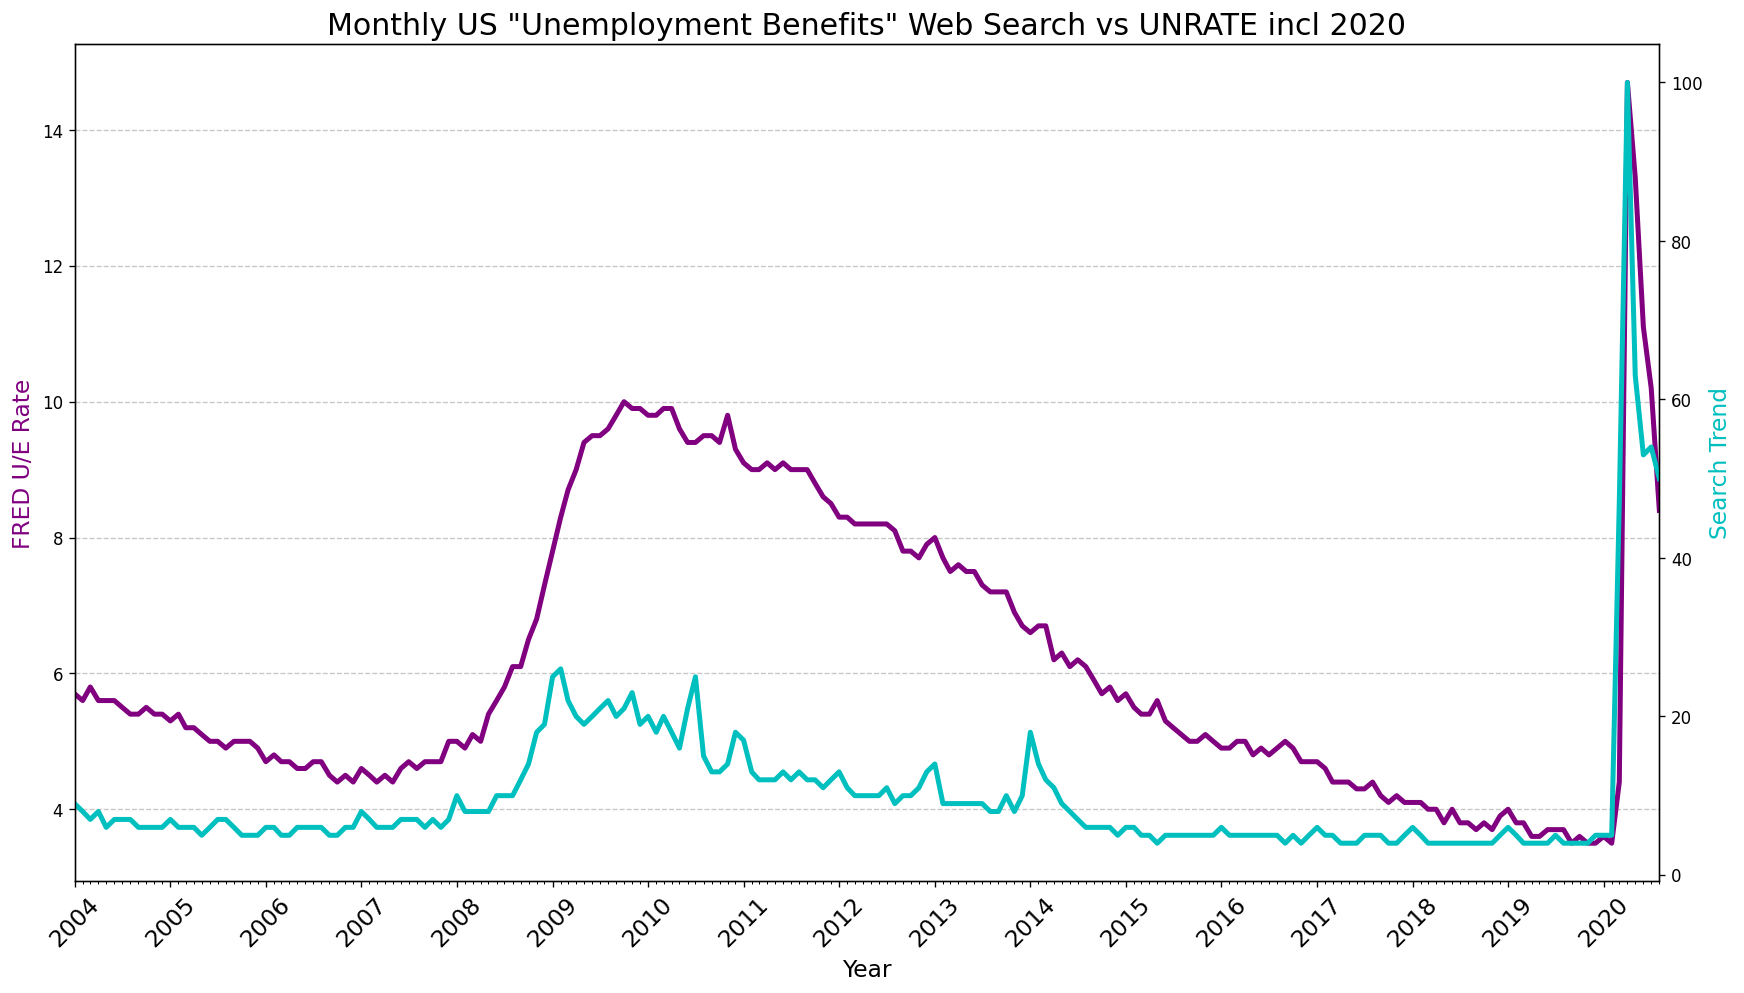

In [79]:
plt.figure(figsize=(14, 8), dpi = 120)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize = 18)
plt.grid(True, axis = "y", linestyle = "--", alpha = 0.7)
plt.xticks(rotation = 45, fontsize = 14)
plt.tight_layout()

axis1 = plt.gca() # get current axis
axis1.xaxis.set_major_locator(years)  # Use major locator for years
axis1.xaxis.set_major_formatter(years_fmt)  # Set formatter for years
axis1.xaxis.set_minor_locator(months)  # Use minor locator for months
axis2 = axis1.twinx() # create a second axis; twinx means they will share the same x-axis

axis1.plot(df_ue2020.MONTH, df_ue2020.UNRATE, color = "purple", linewidth = 3)
axis2.plot(df_ue2020.MONTH, df_ue2020.UE_BENEFITS_WEB_SEARCH, "c", linewidth = 3)
# then, put the exact name of the columns you want for axis 1 and axis 2

axis1.set_xlim([df_ue2020.MONTH.min(), df_ue2020.MONTH.max()]) # to set x-axis limits

# Add labels and title
axis1.set_xlabel("Year", fontsize = 14)
axis1.set_ylabel("FRED U/E Rate", color = "purple", fontsize = 14)
axis2.set_ylabel("Search Trend", color = "c", fontsize = 14) # i like this blue better >:D
